**Evaluation Metrics**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from collections import OrderedDict
import pandas as pd

dataset = datasets.load_boston()

c:\Users\USER\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [2]:
from sklearn.model_selection import train_test_split

In [6]:
rand_state = 1234

In [7]:
deg = 5
alpha = 0.001

# Prepare the data
x = dataset['data'][:, [12]]
y = dataset['target']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=rand_state)

# Preprocess the data
poly = PolynomialFeatures(degree=deg, include_bias=False)
x_train_poly = poly.fit_transform(x_train)

# Init a linear model
model = linear_model.LinearRegression(normalize=True)
# Train the model
model.fit(x_train_poly, y_train)

c:\Users\USER\miniconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

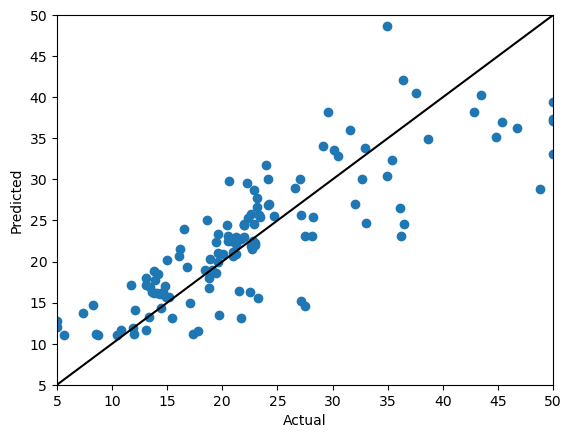

In [ ]:
# Scatter the plot between the actual and predicted values
y_test_pred = model.predict(poly.transform(x_test))
min_ = min(y_test.min(), y_test_pred.min())
max_ = max(y_test.max(), y_test_pred.max())
plt.scatter(y_test, y_test_pred)
plt.xlim([min_, max_])
plt.ylim([min_, max_])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([min_, max_], [min_, max_], c='k')

In [9]:
from sklearn import metrics

In [ ]:
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
nrmse = rmse / np.mean(y_train) # Notice that we use the y_train stats cuz we never know the actual target
r2 = metrics.r2_score(y_test, y_test_pred)
print(mse, rmse, nrmse, r2)

# rmse let u see what the actual mean of error is, which in this case is 5.66*1000 $
# nrmse let u see the percentage, in this case, the error is 25% of the mean of house prices

32.075172414930414 5.663494717480578 0.2531715671685526 0.6863498184545722
